In [2]:
library(tidyverse)
library(repr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
options(repr.plot.width=4, repr.plot.height=3)

In [4]:
df = read.csv('data/ads.csv', stringsAsFactors = FALSE)
df = as_tibble(df)

In [5]:
df$ad_creation_time = as.POSIXct(df$ad_creation_time)

# Analizyng variable distribution
Looking for outliers and problems in the data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


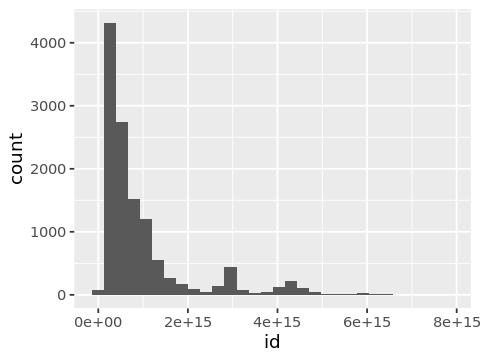

In [4]:
#ids
ggplot(data = df) +
    geom_histogram(mapping = aes(x = id))

In [38]:
# All ids are unique
df[duplicated(df$id),] #No columns duplicated

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

X id ad_creation_time ad_creative_bodies ad_creative_body
     ad_creative_link_caption ad_creative_link_captions
     ad_creative_link_description ad_creative_link_descriptions
     ad_creative_link_title ... languages page_id page_name publisher_platforms
     estimated_audience_size_lower_bound estimated_audience_size_upper_bound
     impressions_lower_bound impressions_upper_bound spend_lower_bound
     spend_upper_bound

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


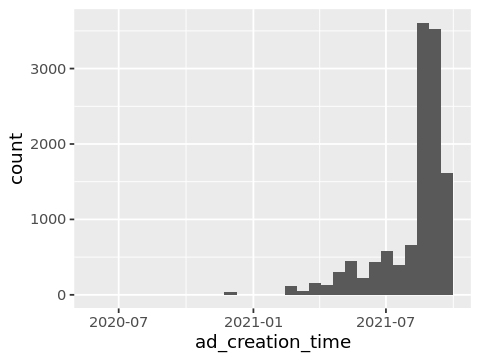

In [36]:
# Most adds are more concentrated around August and September
# There also semms to be some ads created before January 2021
ggplot(data = df) +
    geom_histogram(mapping =  aes(x = ad_creation_time))

In [49]:
filter(df, ad_creation_time < '2021-01-01')

X     id           ad_creation_time
1  10476 4.000528e+14 2020-12-02      
2  10477 1.070570e+15 2020-12-02      
3  10478 1.993061e+14 2020-12-02      
4  10479 3.713698e+14 2020-12-02      
5  10480 3.813470e+14 2020-12-02      
6  10481 8.231454e+14 2020-12-02      
7  10482 1.141938e+14 2020-12-02      
8  10483 1.004552e+15 2020-12-02      
9  10484 1.333217e+14 2020-12-02      
10 10485 1.849833e+14 2020-12-02      
11 10486 6.761231e+14 2020-12-02      
12 10487 7.042943e+14 2020-12-02      
13 10488 2.187614e+15 2020-12-02      
14 10489 2.539284e+15 2020-12-02      
15 10490 4.387115e+14 2020-12-02      
16 10491 7.535292e+14 2020-12-02      
17 10492 4.349449e+14 2020-12-02      
18 10493 8.513945e+14 2020-12-02      
19 10494 3.848069e+14 2020-12-02      
20 10495 6.904516e+14 2020-12-02      
21 10496 2.057361e+14 2020-12-02      
22 10497 2.985232e+14 2020-12-02      
23 10498 1.396572e+14 2020-12-02      
24 10499 1.458789e+14 2020-12-02      
25 10500 4.022391e+14 2020-12-02      
26 10501 6.772262e+14 2020-12-02      
27 10502 3.433107e+15 2020-12-02      
28 10503 3.557717e+15 2020-12-02      
29 10504 2.959253e+14 2020-12-02      
30 10505 1.256010e+15 2020-12-02      
31 10506 1.529022e+15 2020-12-02      
32 10507 1.141382e+14 2020-12-02      
33 10508 4.169208e+14 2020-12-02      
34 10509 5.023744e+14 2020-12-02      
35 10510 7.127246e+14 2020-12-02      
36 10511 4.247050e+14 2020-12-02      
37 10512 3.760001e+15 2020-12-02      
38 10513 3.837167e+14 2020-12-02      
39 10514 6.938247e+14 2020-12-02      
40 10515 1.121982e+15 2020-12-02      
41 10516 1.122728e+15 2020-12-02      
42 10517 2.751714e+15 2020-12-02      
43 10518 3.868164e+15 2020-12-02      
44 12309 3.315696e+14 2020-10-01      
45 12310 2.609678e+14 2020-06-22      
46 12311 1.081624e+15 2020-06-15      
47 12312 5.405133e+14 2020-06-01      
   ad_creative_bodies                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1  ['Il faut agir audacieusement dès maintenant pour protéger les générations futures. Aidez le gouvernement libéral à lutter contre la pollution plastique. 🌎', 'Le moment est venu d’éliminer la pollution plastique au Canada. Ajoutez votre nom.', 'Protégeons les océans contre les plastiques à usage unique nocifs et bâtissons un Canada plus propre et plus résilient. Aidez-nous à interdire les plastiques à usage unique nocifs!', 'Nous avons un plan pour atteindre notre objectif de zéro déchet de plastique d’ici 2030. Ajoutez votre nom pour montrer votre appui.', 'La pollution plastique nuit à nos rivières, à nos lacs, à nos océans et à notre faune. C’est pourquoi le gouvernement libéral interdit les plastiques à usage unique nocifs comme les sacs et les pailles. Montrez votre appui.']
2  ['Il faut agir audacieusement dès maintenant pour protéger les générations futures. Aidez le gouvernement libéral à lutter contre la pollution plastique. 🌎', 'Le moment est venu d’éliminer la pollution plastique au Canada. Ajoutez votre nom.', 'Protégeons les océans contre les plastiques à usage unique nocifs et bâtissons un Canada plus propre et plus résilient. Aidez-nous à interdire les plastiques à usage unique nocifs!', 'Nous avons un plan pour atteindre notre objectif de zéro déchet de plastique d’ici 2030. Ajoutez votre nom pour

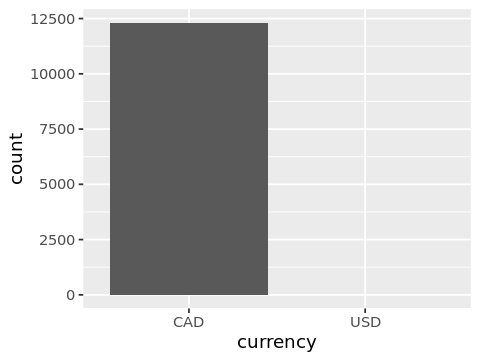

In [45]:
# There seem to be some ads paid in dollar
ggplot(data = df) +
    geom_bar(mapping = aes(x = currency))

In [47]:
# This add seems incomplete. Whe should try to exclude these
filter(df, currency == 'USD')

X   id           ad_creation_time
1 934 1.622213e+15 2021-07-20      
  ad_creative_bodies                                       
1 ["In case you couldn't guess, there's a BIG difference."]
  ad_creative_body                                     
1 In case you couldn't guess, there's a BIG difference.
  ad_creative_link_caption ad_creative_link_captions
1                                                   
  ad_creative_link_description ad_creative_link_descriptions
1                                                           
  ad_creative_link_title ... languages page_id      page_name
1                        ... ['en']    5.577243e+14 Right Now
  publisher_platforms                    estimated_audience_size_lower_bound
1 ['facebook', 'instagram', 'messenger'] 1000001                            
  estimated_audience_size_upper_bound impressions_lower_bound
1 NA                                  3000                   
  impressions_upper_bound spend_lower_bound spend_upper_bound
1 3999                    0                 99

In [62]:
df$ad_creative_bodies_length = nchar(df$ad_creative_bodies)

In [65]:
# Most ads bodies are withing the 200 - 500 word length
# There are outliers with close to 3000 words and there also may be ads with very little body lengths (incomplete ads)

ggplot(data = df) +
    geom_histogram(mapping = aes(x = ad_creative_bodies_length))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In [74]:
df$ad_creative_link_caption_length = nchar(df$ad_creative_link_caption)

In [79]:
# Seems prettry regular with up to 75 chars
# We better check ou the cases where the length is zero
ggplot(data = df) +
    geom_histogram(mapping = aes(x = ad_creative_link_caption_length))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In [80]:
filter(df, ad_creative_link_caption_length == 0)

X     id           ad_creation_time
1    60   2.021160e+15 2021-09-17      
2   446   5.082235e+14 2021-05-28      
3   449   3.393087e+14 2021-05-14      
4   496   4.005234e+14 2021-09-10      
5   497   2.644657e+15 2021-09-10      
6   572   6.059984e+14 2021-09-17      
7   577   5.475406e+14 2021-09-17      
8   599   9.543454e+14 2021-09-10      
9   600   8.792405e+14 2021-09-09      
10  601   3.497754e+14 2021-09-17      
11  602   1.396902e+15 2021-09-17      
12  603   4.304816e+14 2021-09-15      
13  604   5.403220e+14 2021-09-15      
14  605   8.801682e+14 2021-09-14      
15  606   5.528272e+14 2021-09-13      
16  607   5.603436e+14 2021-09-11      
17  608   9.185799e+14 2021-09-10      
18  609   1.797176e+15 2021-09-10      
19  610   4.048601e+14 2021-09-08      
20  611   5.586546e+14 2021-09-08      
21  612   4.561814e+14 2021-09-08      
22  613   3.287546e+14 2021-09-08      
23  614   8.971136e+14 2021-09-08      
24  615   4.401358e+14 2021-09-07      
25  616   5.843455e+14 2021-09-07      
26  617   2.673585e+14 2021-09-01      
27  618   2.656813e+14 2021-09-01      
28  619   4.391074e+15 2021-09-01      
29  620   3.650301e+15 2021-09-01      
30  621   3.753784e+14 2021-08-31      
... ...   ...          ...             
924 12251 3.511617e+14 2021-07-21      
925 12252 5.182730e+14 2021-07-21      
926 12253 2.579890e+14 2021-07-16      
927 12254 3.307641e+14 2021-07-16      
928 12255 3.699849e+14 2021-07-16      
929 12256 4.066004e+14 2021-07-16      
930 12257 5.594160e+14 2021-07-16      
931 12258 8.357101e+14 2021-07-16      
932 12259 9.315233e+14 2021-07-16      
933 12260 3.069632e+15 2021-07-16      
934 12261 3.977507e+15 2021-07-16      
935 12262 3.549263e+14 2021-07-09      
936 12263 8.274293e+14 2021-07-09      
937 12264 2.996414e+15 2021-07-09      
938 12265 3.486361e+14 2021-07-09      
939 12266 2.303081e+14 2021-07-08      
940 12267 8.600102e+14 2021-07-08      
941 12268 1.986401e+14 2021-07-07      
942 12269 2.986620e+14 2021-07-07      
943 12270 1.914511e+14 2021-07-07      
944 12271 1.452038e+15 2021-07-07      
945 12272 1.099379e+15 2021-07-06      
946 12273 1.360411e+15 2021-07-06      
947 12274 5.450279e+14 2021-07-06      
948 12275 7.998519e+14 2021-07-06      
949 12276 5.000827e+14 2021-07-06      
950 12277 3.446030e+14 2021-06-30      
951 12282 3.165872e+14 2021-06-17      
952 12297 1.096490e+15 2021-05-03      
953 12298 4.696005e+14 2021-04-30      
    ad_creative_bodies                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1   ['Where do the main parties stand on key environmental issues? Check out th

In [82]:
df$ad_creative_description_length = nchar(df$ad_creative_link_description)

In [86]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = ad_creative_description_length))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In [90]:
df$ad_creative_link_title_length = nchar(df$ad_creative_link_title)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


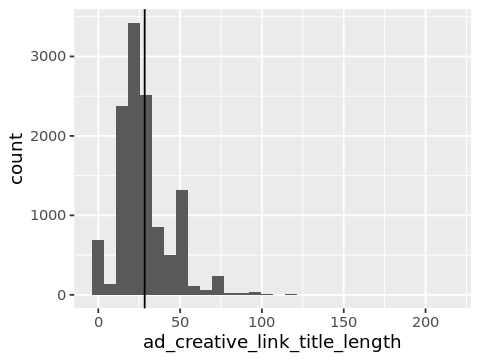

In [95]:
# There aren't many outliers. Titles seems to be about 40
ggplot(data = df) +
    geom_histogram(mapping =  aes(x = ad_creative_link_title_length)) +
    geom_vline(mapping = aes(xintercept = mean(ad_creative_link_title_length)))

In [96]:
df$ad_delivery_start_time = as.POSIXct(df$ad_delivery_start_time)

In [97]:
df$ad_delivery_stop_time = as.POSIXct(df$ad_delivery_stop_time)

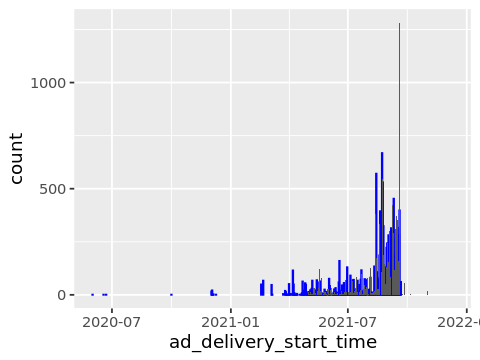

In [102]:
ggplot(data = df) + 
    geom_bar(mapping = aes(x = ad_delivery_start_time), color = "blue") + 
    geom_bar(mapping = aes(x = ad_delivery_stop_time))

In [106]:
df$ad_running_time = df$ad_delivery_stop_time - df$ad_delivery_start_time

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


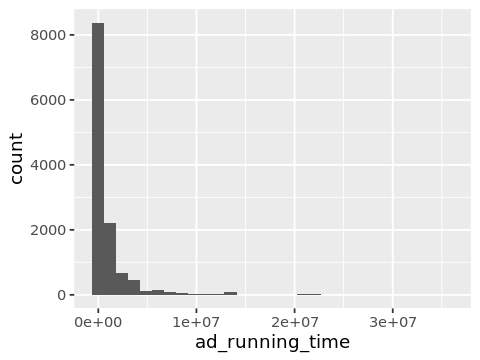

In [108]:
# Ad running time seems to obey and exponential distribution, with a prevalence of very short running ads
ggplot(data = df) +
    geom_histogram(mapping = aes(x = ad_running_time))

In [116]:
ggplot(data = df) + 
    geom_bar(mapping = aes(x = languages))

In [120]:
df %>%
    filter(languages != "['en']", languages != "['fr']", languages != "['fr', 'en']")

X     id           ad_creation_time
1   1193  1.371002e+15 2021-06-16      
2   1300  3.671093e+14 2021-08-30      
3   1407  8.395253e+14 2021-08-24      
4   1512  3.057755e+15 2021-09-18      
5   1522  3.796284e+14 2021-09-18      
6   1574  1.671522e+14 2021-09-18      
7   1609  2.426739e+14 2021-09-18      
8   1768  8.469479e+14 2021-09-18      
9   1775  8.730387e+14 2021-09-18      
10  1777  8.808257e+14 2021-09-18      
11  1831  1.038450e+15 2021-09-18      
12  1838  1.162776e+15 2021-09-18      
13  1856  1.753244e+15 2021-09-18      
14  1859  2.059269e+15 2021-09-18      
15  1861  2.134242e+15 2021-09-18      
16  1878  3.054229e+15 2021-09-18      
17  1886  4.265499e+15 2021-09-18      
18  2345  1.064331e+15 2021-09-16      
19  2576  2.558338e+14 2021-09-14      
20  2584  2.370036e+14 2021-09-14      
21  2589  3.083376e+15 2021-09-14      
22  2590  2.081740e+14 2021-09-14      
23  2591  1.325934e+15 2021-09-14      
24  2863  5.333421e+14 2021-09-12      
25  2867  8.802908e+14 2021-09-12      
26  2868  9.117525e+14 2021-09-12      
27  2869  1.133358e+14 2021-09-12      
28  2870  5.454265e+14 2021-09-12      
29  2897  5.449356e+14 2021-09-10      
30  2899  5.656261e+14 2021-09-10      
... ...   ...          ...             
41   3038 3.225024e+15 2021-09-10      
42   3231 2.052762e+14 2021-09-09      
43   3246 2.770952e+14 2021-09-09      
44   3258 3.811732e+14 2021-09-09      
45   3287 5.907474e+14 2021-09-09      
46   3291 6.564232e+14 2021-09-09      
47   3304 9.518164e+14 2021-09-09      
48   3552 9.094031e+14 2021-09-08      
49   4199 9.722838e+14 2021-09-05      
50   4614 2.200870e+14 2021-09-02      
51   7190 1.187611e+15 2021-08-14      
52   7192 1.784200e+15 2021-08-14      
53   7654 1.509831e+15 2021-08-13      
54   9788 4.578063e+14 2021-05-06      
55  10782 1.517320e+14 2021-04-13      
56  11253 1.260232e+15 2021-09-15      
57  11255 1.112831e+15 2021-09-15      
58  11282 1.603285e+14 2021-09-13      
59  11283 2.882948e+14 2021-09-13      
60  11363 2.230105e+14 2021-09-13      
61  11364 9.169349e+14 2021-09-13      
62  11365 4.131981e+14 2021-09-13      
63  11366 2.835085e+14 2021-09-13      
64  11572 6.141218e+15 2021-09-08      
65  11582 7.962734e+14 2021-09-07      
66  11583 3.786223e+15 2021-09-07      
67  11585 8.747875e+14 2021-09-07      
68  11600 2.228072e+15 2021-09-07      
69  11629 3.737747e+14 2021-09-06      
70  11699 9.783236e+14 2021-09-04      
    ad_creative_bodies                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1   ['ਮਹਾਂਮਾਰੀ ਦੇ ਕਾਰਨ ਕਿਸੇ ਨੂੰ ਵੀ ਆਪਣੀ ਨੌਕਰੀ ਤੋਂ ਹੱਥ ਧੋਣਾ ਨਹੀਂ ਚਾਹੀਦਾ. ਪਟੀਸ਼ਨ ਤੇ ਦਸਤਖਤ ਕਰੋ: https://actionnetwork.org/petitions/not-true-trudeau', ' ']                                                                                                                                                                                                                                                                                                                                             
2   ['This election, make environment issue #1\\n100 Debates across Canada - Join yours!\\n\\nParkdale - High Park:\\nRegister Now: https://bit.ly/3gNNKkp\\n\\nNot your riding? No problem - Find your debate:\\nwww.100debates.ca/debates']                                                                                                                                                                                                                                          
3                                                                                             

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


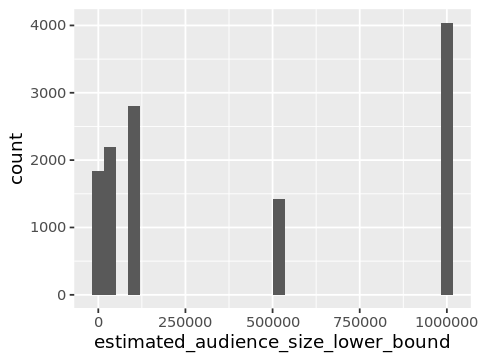

In [22]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = estimated_audience_size_lower_bound))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4040 rows containing non-finite values (stat_bin).”

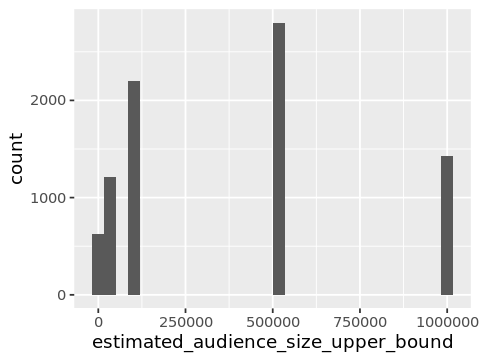

In [23]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = estimated_audience_size_upper_bound))

In [27]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = impressions_lower_bound))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 53 rows containing non-finite values (stat_bin).”

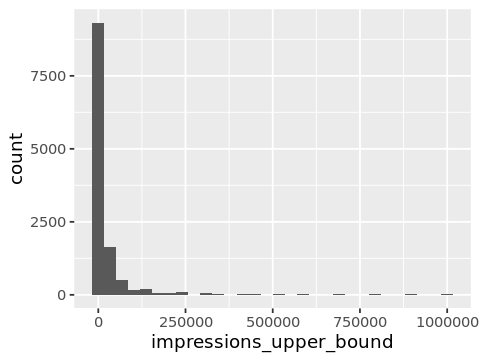

In [28]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = impressions_upper_bound))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


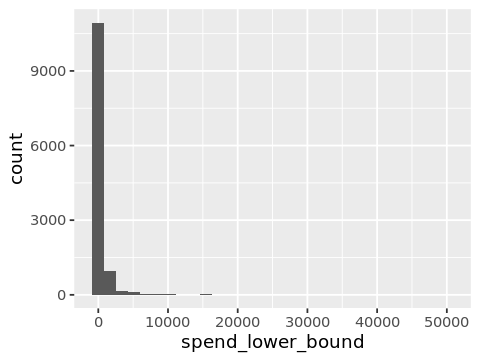

In [29]:
ggplot(data = df) +
    geom_histogram(mapping = aes(x = spend_lower_bound))

In [ ]:
dd